In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### pandas -> data handling grouping categorical analysis
#### numpy -> numerical operations & normalization
#### matplotlib -> base plotting (histograms)
#### seaborn -> advanced statistical plots

## first step : load dataset

In [19]:
df = pd.read_csv("Students_Performance.csv")

In [20]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [21]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## data preprocessing 
## 1. check missing values

In [22]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [23]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Gender vs Average Scores

In [25]:
gender_analysis = df.groupby("gender")[["math score", "reading score", "writing score"]].mean()

In [26]:
gender_analysis

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


## test preparation impact

In [29]:
prep_analysis = df.groupby("test preparation course")[["math score", "reading score", "writing score"]].mean()

In [30]:
prep_analysis

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


## parental education impace

In [48]:
df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean().sort_values("math score")

,math score,reading score,writing score
parental level of education,,,
high school,62.137755,64.704082,62.448980
some high school,63.497207,66.938547,64.888268
some college,67.128319,69.460177,68.840708
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
master's degree,69.745763,75.372881,75.677966


### Numpy score normalization
### min-max normalization formula = (x - min)(max - min)

In [31]:
for col in ["math score", "reading score", "writing score"]:
    df[col + "_normalized"] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math score_normalized,reading score_normalized,writing score_normalized
0,female,group B,bachelor's degree,standard,none,72,72,74,0.72,0.662651,0.711111
1,female,group C,some college,standard,completed,69,90,88,0.69,0.879518,0.866667
2,female,group B,master's degree,standard,none,90,95,93,0.90,0.939759,0.922222
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.47,0.481928,0.377778
4,male,group C,some college,standard,none,76,78,75,0.76,0.734940,0.722222


## visualization

### Histogram - score distribution

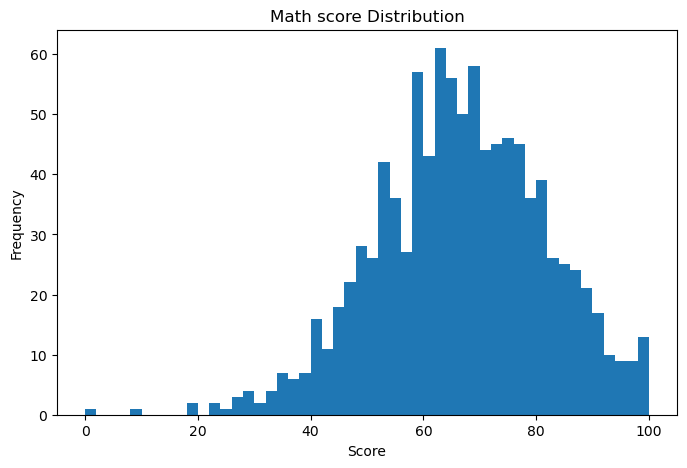

In [39]:
plt.figure(figsize=(8,5))
plt.hist(df["math score"], bins=50)
plt.title("Math score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

## Boxplot - Gender vs scores

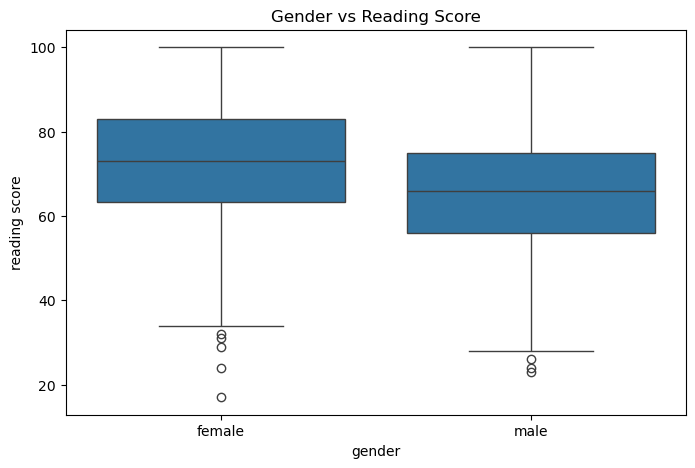

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x = "gender", y = "reading score", data = df)
plt.title("Gender vs Reading Score")
plt.show()


## violin plot - test prep

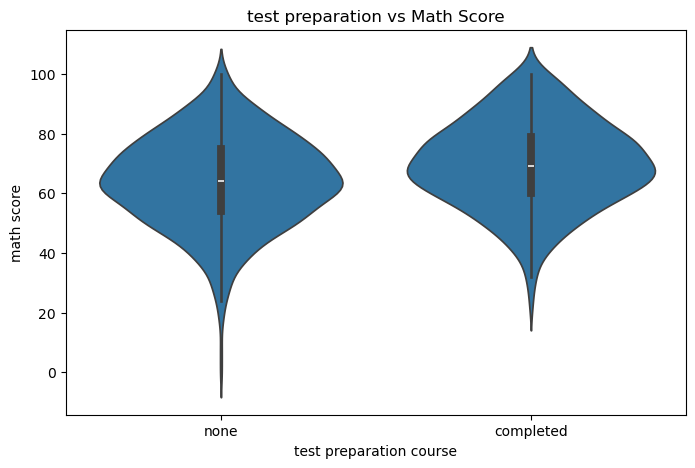

In [43]:
plt.figure(figsize=(8,5))
sns.violinplot(x="test preparation course", y = "math score", data= df)
plt.title("test preparation vs Math Score")
plt.show()